<a href="https://colab.research.google.com/github/CarlosSotero/Analise_Estatistica_de_Salarios_em_Dados/blob/main/Desafio_Novo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
# Importando as bibliotecas
import pandas as pd
import numpy as ny
import matplotlib.pyplot as plt
import seaborn as sns

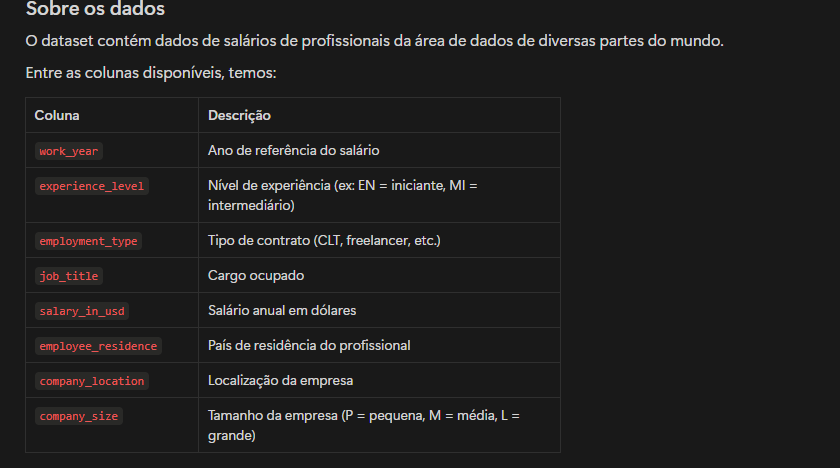

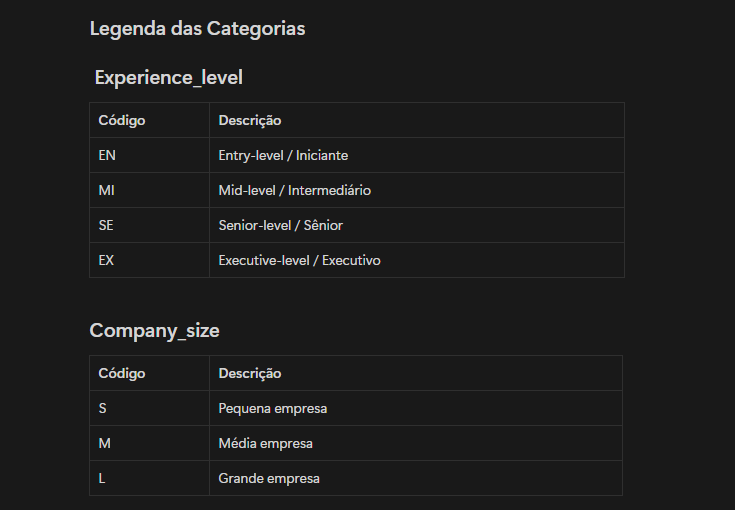

In [52]:
# Atribuindo o dataframe a variável
salario_profissionais_dados = pd.read_csv('salario_profissionais_dados.csv')
# Visualizando as cinco primeiras linhas do df
salario_profissionais_dados.head()

,work_year,country,region,experience_level,job_title,salary_in_usd,employee_residence,company_location,company_size,years_of_experience
0,2023,Spain,Europe,SE,Principal Data Scientist,85847,ES,ES,L,8
1,2023,United States of America,Americas,MI,ML Engineer,30000,US,US,S,5
2,2023,United States of America,Americas,MI,ML Engineer,25500,US,US,S,3
3,2023,Canada,Americas,SE,Data Scientist,175000,CA,CA,M,8
4,2023,Canada,Americas,SE,Data Scientist,120000,CA,CA,M,8


In [53]:
# Analisando as informações do df
salario_profissionais_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   work_year            3755 non-null   int64 
 1   country              3755 non-null   object
 2   region               3755 non-null   object
 3   experience_level     3755 non-null   object
 4   job_title            3755 non-null   object
 5   salary_in_usd        3755 non-null   int64 
 6   employee_residence   3755 non-null   object
 7   company_location     3755 non-null   object
 8   company_size         3755 non-null   object
 9   years_of_experience  3755 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 293.5+ KB


In [54]:
# Verificando o tamanho do df
salario_profissionais_dados.shape

(3755, 10)

In [55]:
# Analisando se existem dados nulos
salario_profissionais_dados.isna().sum()

,0
work_year,0
country,0
region,0
experience_level,0
job_title,0
salary_in_usd,0
employee_residence,0
company_location,0
company_size,0
years_of_experience,0


In [56]:
# Estatísticas descritivas do df
salario_profissionais_dados.describe()

,work_year,salary_in_usd,years_of_experience
count,3755.000000,3755.000000,3755.000000
mean,2022.373635,137570.389880,5.970972
std,0.691448,63055.625278,2.062673
min,2020.000000,5132.000000,1.000000
25%,2022.000000,95000.000000,5.000000
50%,2022.000000,135000.000000,6.000000
75%,2023.000000,175000.000000,8.000000
max,2023.000000,450000.000000,10.000000


In [57]:
# Filtrando a quantidade por cargos
cargos = salario_profissionais_dados['job_title'].value_counts(ascending=False).head(10)
# Filtrando a quantidade por cargos em porcentagem
cargos_porcentagem = salario_profissionais_dados['job_title'].value_counts(normalize=True, ascending=False).head(10) * 100
# Concatenando para melhor visualização
concatenado_cargos = pd.concat([cargos, cargos_porcentagem], axis=1)
concatenado_cargos.reset_index()

,job_title,count,proportion
0,Data Engineer,1040,27.696405
1,Data Scientist,840,22.370173
2,Data Analyst,612,16.298269
3,Machine Learning Engineer,289,7.696405
4,Analytics Engineer,103,2.743009
5,Data Architect,101,2.689747
6,Research Scientist,82,2.183755
7,Applied Scientist,58,1.544607
8,Data Science Manager,58,1.544607
9,Research Engineer,37,0.985353


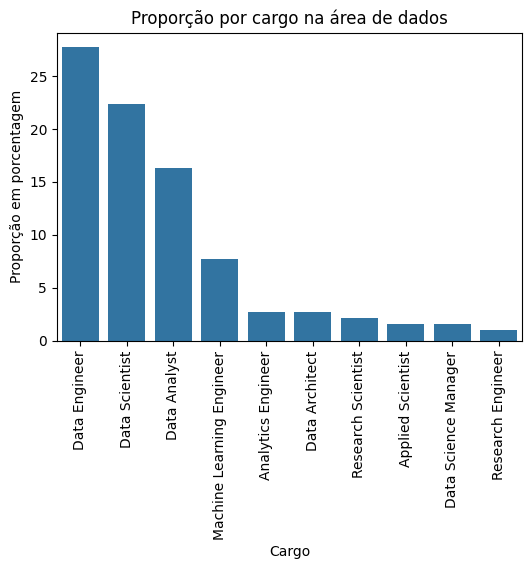

In [58]:
plt.figure(figsize=(6, 4))
sns.barplot(concatenado_cargos, x='job_title', y='proportion')
plt.xticks(rotation=90);
plt.title('Proporção por cargo na área de dados')
plt.xlabel('Cargo')
plt.ylabel('Proporção em porcentagem')
plt.xticks(rotation=90)
plt.show();

In [59]:
# Filtrando a quantidade por nível de experiência
nivel = salario_profissionais_dados['experience_level'].value_counts(ascending=False).head(10)
# Filtrando a quantidade por cargos em porcentagem
nivel_porcentagem = salario_profissionais_dados['experience_level'].value_counts(normalize=True, ascending=False).head(10) * 100
# Concatenando para melhor visualização
nivel_df = pd.concat([nivel, nivel_porcentagem], axis=1)
nivel_df

,count,proportion
experience_level,,
SE,2516,67.003995
MI,805,21.438083
EN,320,8.521971
EX,114,3.035952


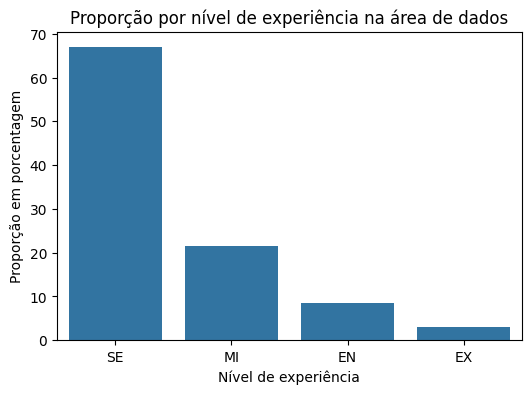

In [60]:
# Plotando o gráfico de barras
plt.figure(figsize=(6,4))
sns.barplot(nivel_df, x='experience_level', y='proportion');
plt.title('Proporção por nível de experiência na área de dados')
plt.xlabel('Nível de experiência')
plt.ylabel('Proporção em porcentagem')
plt.show();

In [61]:
# Filtrando pela tamanho da empresa
tamanho = salario_profissionais_dados['company_size'].value_counts(ascending=False).head(10)
# Filtrando pela tamanho da empresa em porcentagem
tamanho_porcentagem = salario_profissionais_dados['company_size'].value_counts(normalize=True, ascending=False).head(10) * 100
# Concatenando para melhor visualização
tamanho_df = pd.concat([tamanho, tamanho_porcentagem], axis=1)
tamanho_df

,count,proportion
company_size,,
M,3153,83.968043
L,454,12.090546
S,148,3.941411


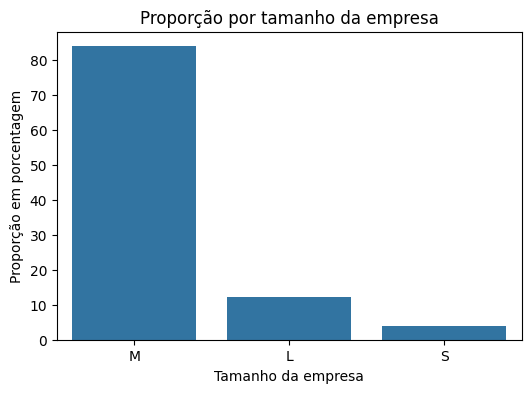

In [62]:
# Plotando o gráfico de barras
plt.figure(figsize=(6, 4))
sns.barplot(tamanho_df, x='company_size', y='proportion');
plt.title('Proporção por tamanho da empresa')
plt.xlabel('Tamanho da empresa')
plt.ylabel('Proporção em porcentagem')
plt.show();

In [63]:
# Média salarial pelo tamanho da empresa
media_salario = salario_profissionais_dados.groupby('company_size')['salary_in_usd'].mean().sort_values(ascending=False)
media_salario

,salary_in_usd
company_size,
M,143130.548367
L,118300.982379
S,78226.682432


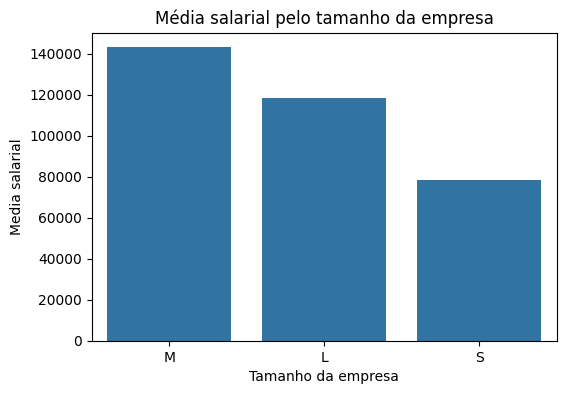

In [64]:
# Plotando o gráfico da média salarial pelo tamanho da empresa
plt.figure(figsize=(6, 4))
sns.barplot(media_salario);
plt.title('Média salarial pelo tamanho da empresa')
plt.xlabel('Tamanho da empresa')
plt.ylabel('Media salarial')
plt.show();


In [65]:
# Média de sálario pela experiência
salario_agrupados = salario_profissionais_dados.groupby('experience_level')['salary_in_usd'].mean().sort_values(ascending=False)
salario_agrupados

,salary_in_usd
experience_level,
EX,194930.929825
SE,153051.071542
MI,104525.939130
EN,78546.284375


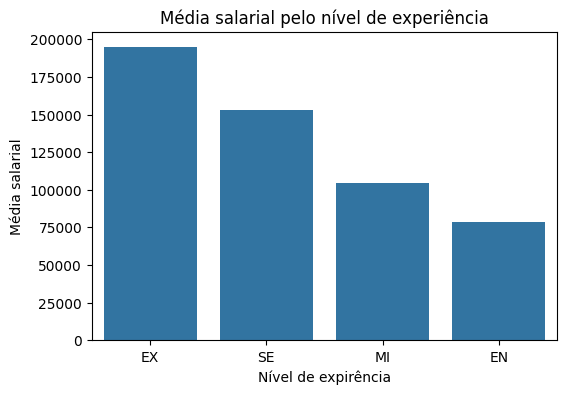

In [66]:
# Plotando o gráfico média de salario pela experiência
plt.figure(figsize=(6, 4))
sns.barplot(salario_agrupados);
plt.title('Média salarial pelo nível de experiência')
plt.xlabel('Nível de expirência')
plt.ylabel('Média salarial')
plt.show();

In [67]:
# Top 10 média de sálario pelo cargo
top10_salarios = salario_profissionais_dados.groupby('job_title')['salary_in_usd'].mean().head(10).sort_values(ascending=False)
top10_salarios

,salary_in_usd
job_title,
Applied Scientist,190264.482759
Analytics Engineer,152368.631068
AI Developer,136666.090909
Applied Data Scientist,113726.300000
AI Scientist,110120.875000
Applied Machine Learning Scientist,109452.833333
Applied Machine Learning Engineer,99875.500000
AI Programmer,55000.000000
Autonomous Vehicle Technician,26277.500000


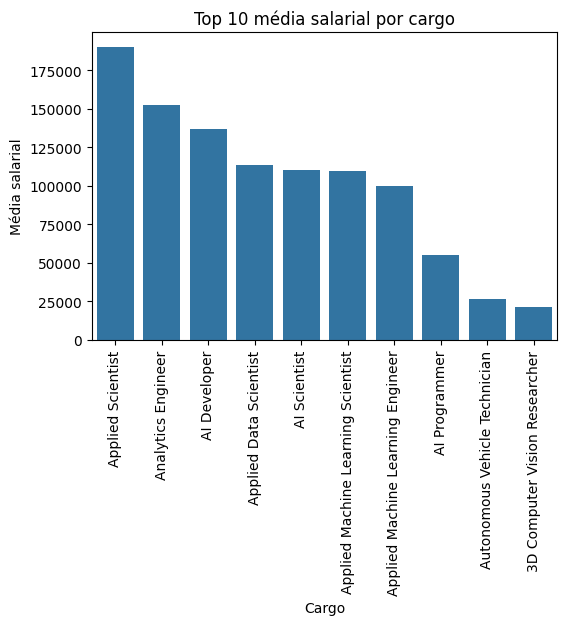

In [68]:
# Plotando o gráfico de Top10 média salarial por cargo
plt.figure(figsize=(6, 4))
sns.barplot(top10_salarios)
plt.title('Top 10 média salarial por cargo')
plt.xlabel('Cargo')
plt.ylabel('Média salarial')
plt.xticks(rotation=90)
plt.show();


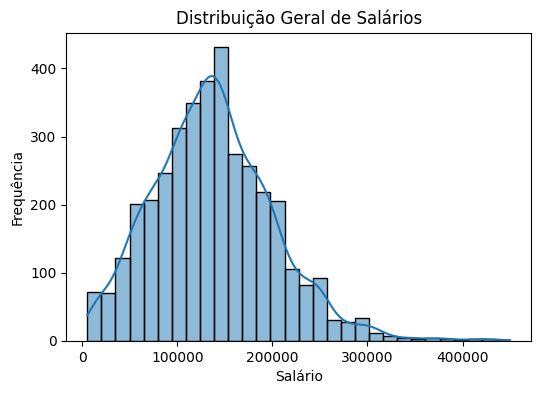

In [69]:
# Gráfico de distribuição de salários
plt.figure(figsize=(6, 4))
sns.histplot(salario_profissionais_dados['salary_in_usd'], bins=30, kde=True)
plt.title('Distribuição Geral de Salários')
plt.xlabel('Salário')
plt.ylabel('Frequência')
plt.show();


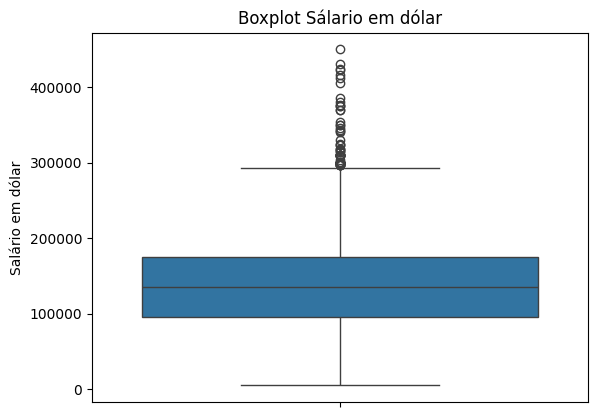

In [70]:
# Plotando gráfico de Boxplot
sns.boxplot(salario_profissionais_dados['salary_in_usd'])
plt.title('Boxplot Sálario em dólar')
plt.ylabel('Salário em dólar');

Text(0, 0.5, 'Anos de experiência')

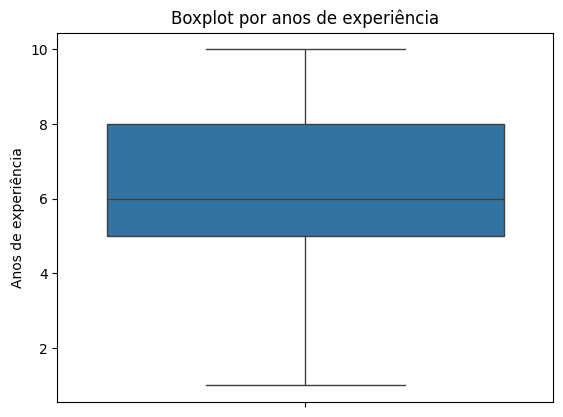

In [71]:
# Plotando gráfico de Boxplot
sns.boxplot(salario_profissionais_dados['years_of_experience'])
plt.title('Boxplot por anos de experiência')
plt.ylabel('Anos de experiência')

In [72]:
# Top 10 países com maiores média salárial
top10_paises = salario_profissionais_dados.groupby('country')['salary_in_usd'].mean().nlargest(10).sort_values(ascending=False)
top10_paises

,salary_in_usd
country,
Israel,423834.000000
Malaysia,200000.000000
Puerto Rico,166000.000000
United States of America,152822.011651
Canada,132222.905882
China,125404.000000
New Zealand,125000.000000
Bosnia and Herzegovina,120000.000000
Ireland,114943.428571


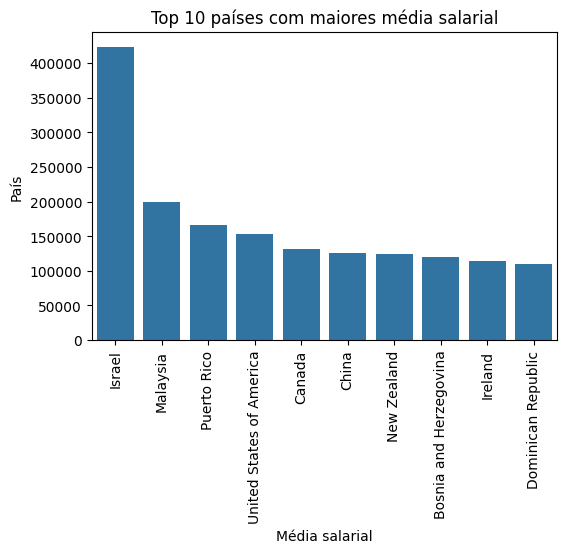

In [73]:
# Plotando gráfico dos Top 10 países com maiores média salarial
plt.figure(figsize=(6, 4))
sns.barplot(top10_paises)
plt.title('Top 10 países com maiores média salarial')
plt.xlabel('Média salarial')
plt.ylabel('País')
plt.xticks(rotation=90)
plt.show();

In [74]:
# Correlação das colunas salary_in_usd, work_year, years_of_experience
correlacao = salario_profissionais_dados[['salary_in_usd', 'work_year', 'years_of_experience']].corr()
correlacao

,salary_in_usd,work_year,years_of_experience
salary_in_usd,1.000000,0.228290,0.410723
work_year,0.228290,1.000000,0.178878
years_of_experience,0.410723,0.178878,1.000000


<Axes: >

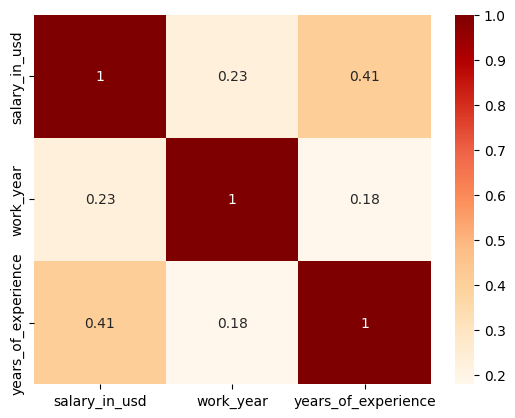

In [75]:
# Mapa de calor de correlações
sns.heatmap(correlacao, annot=True, cmap='OrRd')